In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [5]:
# load dataset and show the first five sample
df = pd.read_csv("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# describe data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [12]:
# create new dataframe that consist only annual income and spending score
df = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Before we analyze our data, we need to scale the data with standardization method

In [16]:
# scale dataset with standard scaler
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data)
print(scaled_df)

            0         1
0   -1.738999 -0.434801
1   -1.738999  1.195704
2   -1.700830 -1.715913
3   -1.700830  1.040418
4   -1.662660 -0.395980
..        ...       ...
195  2.268791  1.118061
196  2.497807 -0.861839
197  2.497807  0.923953
198  2.917671 -1.250054
199  2.917671  1.273347

[200 rows x 2 columns]


In [17]:
# get stastical information on the new dataset
scaled_df.describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

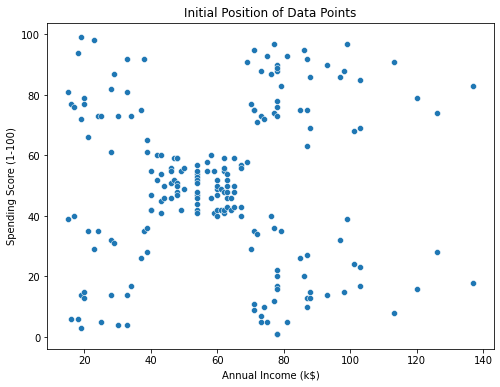

In [25]:
# Visualize the position 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Initial Position of Data Points")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

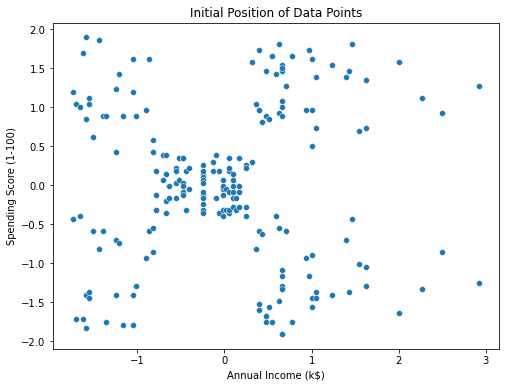

In [27]:
# Visualize the position using the original scale
# Visualize the position 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=0, y=1, data=scaled_df)
plt.title("Initial Position of Data Points")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [48]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, random_state=42)

cluster_assignments = kmeans.fit_predict(scaled_df)
cluster_assignments

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

Visualize your result based on income and spending. You also can show the final position of the centroid.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


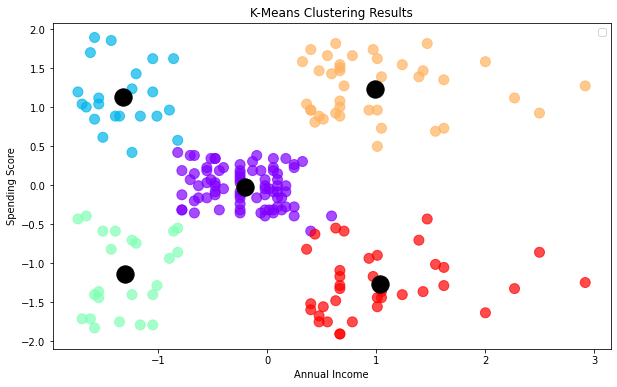

In [53]:
# visualize the result using scater chart
# Add the cluster assignments to the original DataFrame
scaled_df['Cluster'] = cluster_assignments

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Visualize the data points with different clusters and centroid positions
plt.figure(figsize=(10, 6))
plt.scatter(scaled_df[0], scaled_df[1], c=scaled_df['Cluster'], cmap='rainbow', alpha=0.7, s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300)
plt.title("K-Means Clustering Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(loc='upper right')
plt.show()

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

In [61]:
# set the parameter for evaluating K

# check the inertia for each K

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_) 

C:\Users\mahazoya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


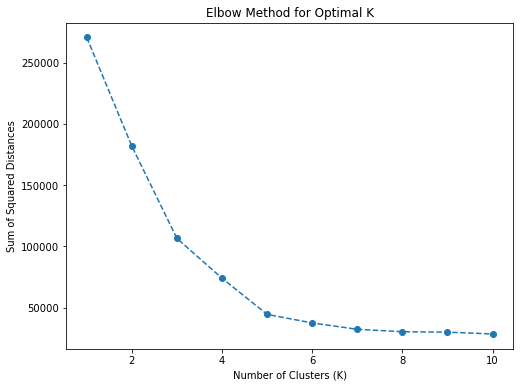

In [62]:
# manually visualize the elbow method using plotlib
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [63]:
from kneed import KneeLocator
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print("The optimal K for your model is", optimal_k)

The optimal K for your model is 5
